## Read  Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A=pd.read_csv("train.csv")

In [3]:
A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
A.shape 

(1460, 81)

## Drop Unnecessary Columns

In [5]:
A.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train=A.drop(["Id","PoolQC","MiscFeature"],axis=1)

In [8]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


## Find and replace the data

In [9]:
train.isna().sum().sort_values(ascending=False)

Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
GarageType       81
               ... 
TotalBsmtSF       0
Heating           0
MSZoning          0
CentralAir        0
SalePrice         0
Length: 78, dtype: int64

In [10]:
def filler(A):
    import pandas as pd
    Q=pd.DataFrame(A.isna().sum(),columns=["Ct"])
    W=Q[Q.Ct>0].index
    for i in A:
        if A[i].dtypes=="object":
            X=A[i].mode()[0]
            A[i]=A[i].fillna(X)
        else  :
            X=A[i].mean()
            A[i]=A[i].fillna(X)
            

In [11]:
filler(train)

In [12]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

## Define X and Y

In [13]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [14]:
Y=train[["SalePrice"]]
X=train.drop(["SalePrice"],axis=1)

## Seprate can and cot

In [15]:
cat=[]
con=[]
for i in X:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [16]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [17]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Univariate 

In [18]:
import numpy as np

In [19]:
X.skew().sort_values()>.7

GarageYrBlt      False
YearBuilt        False
YearRemodAdd     False
GarageCars       False
FullBath         False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
HalfBath         False
TotRmsAbvGrd     False
OverallCond      False
2ndFlrSF          True
BsmtUnfSF         True
GrLivArea         True
1stFlrSF          True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
OpenPorchSF       True
LotFrontage       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
ScreenPorch       True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
MiscVal           True
dtype: bool

In [20]:
col_with_skew=["2ndFlrSF","BsmtUnfSF","GrLivArea","1stFlrSF","MSSubClass","TotalBsmtSF","WoodDeckSF","BsmtFinSF1","OpenPorchSF","LotFrontage",
              "MasVnrArea","EnclosedPorch","BsmtHalfBath","ScreenPorch","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea","MiscVal"]

In [21]:
col_with_skew

['2ndFlrSF',
 'BsmtUnfSF',
 'GrLivArea',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'LotFrontage',
 'MasVnrArea',
 'EnclosedPorch',
 'BsmtHalfBath',
 'ScreenPorch',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'LowQualFinSF',
 '3SsnPorch',
 'LotArea',
 'PoolArea',
 'MiscVal']

## Bivariate

In [22]:
import seaborn as sb
# !pip install seaborn

<AxesSubplot:>

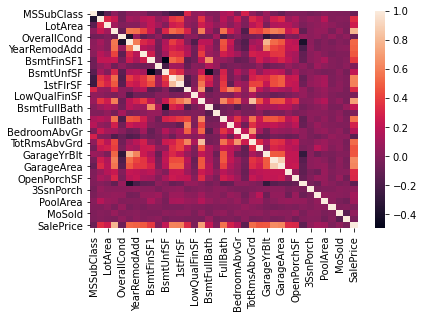

In [23]:
sb.heatmap(train.corr())

In [24]:

imp_cols=list(train.corr()["SalePrice"].sort_values().index)[22:]
imp_cols.remove("SalePrice")

<AxesSubplot:>

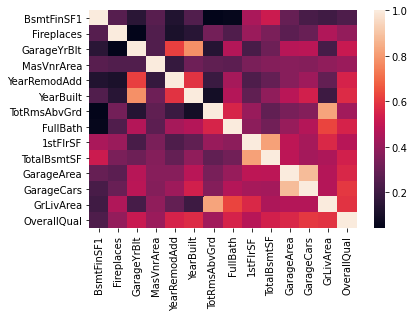

In [25]:
sb.heatmap(X[imp_cols].corr())

## Data Prepration

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X1=pd.get_dummies(X[cat])
X=X2.join(X1)

## OLS model

In [27]:
X = X.drop(['GrLivArea','BsmtFinSF1','YearRemodAdd','OverallQual','MasVnrArea'],axis=1)

In [28]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     67.33
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:30:59   Log-Likelihood:                -16625.
No. Observations:                1460   AIC:                         3.372e+04
Df Residuals:                    1225   BIC:                         3.496e+04
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3001.1034   2501.418      1.200      0.230   -1906.434    7908.641
MSSubClass            -2265.3911   3580.917     -0.633      0.527   -9290.801    4760.019
LotFrontage            1391.3717    983.363      1.415      0.157    -537.890    3320.633
LotArea                7352.9054   1113.499      6.603      0.000    5168.329    9537.482
OverallCond            7628.8442    924.955      8.248      0.000    5814.172    9443.517
YearBuilt              1.142e+04   2332.918      4.896      0.000    6844.194     1.6e+04
BsmtFinSF2            -1831.6686   1301.231     -1.408      0.159   -4384.557     721.220
BsmtUnfSF             -8194.8533   1397.011     -5.866      0.000   -1.09e+04   -5454.054
TotalBsmtSF            1.615e+04   2075.701      7.779      0.000    1.21e+04    2.02e+04
1stFlrSF               2.152e+04   2051.155     10.490      0.000    1.75e+04    2.55e+04
2ndFlrSF               3.135e+04   2471.639     12.683      0.000    2.65e+04    3.62e+04
LowQualFinSF            812.0408    908.692      0.894      0.372    -970.724    2594.806
BsmtFullBath            105.8416   1046.315      0.101      0.919   -1946.925    2158.609
BsmtHalfBath           -155.4390    740.220     -0.210      0.834   -1607.677    1296.799
FullBath               2236.6426   1241.886      1.801      0.072    -199.816    4673.101
HalfBath                856.2655   1075.641      0.796      0.426   -1254.037    2966.568
BedroomAbvGr          -3156.1214   1137.736     -2.774      0.006   -5388.248    -923.994
KitchenAbvGr          -3156.1843   1275.893     -2.474      0.014   -5659.362    -653.007
TotRmsAbvGrd           1643.1055   1576.118      1.043      0.297   -1449.085    4735.296
Fireplaces             2374.4548   1000.900      2.372      0.018     410.787    4338.122
GarageYrBlt             700.9676   1369.698      0.512      0.609   -1986.246    3388.181
GarageCars             2486.6902   1681.976      1.478      0.140    -813.182    5786.562
GarageArea             3259.4735   1698.566      1.919      0.055     -72.948    6591.895
WoodDeckSF             1799.9328    750.349      2.399      0.017     327.821    3272.045
OpenPorchSF             109.6887    775.455      0.141      0.888   -1411.679    1631.057
EnclosedPorch           564.4767    776.499      0.727      0.467    -958.939    2087.892
3SsnPorch               913.7258    672.911      1.358      0.175    -406.460    2233.911
ScreenPorch            1697.5009    701.397      2.420      0.016     321.429    3073.573
PoolArea               3506.2717    769.552      4.556      0.000    1996.486    5016.058
MiscVal                 252.4254    718.725      0.351      0.725   -1157.643    1662.494
MoSold                 -923.3997    674.565     -1.369      0.171   -2246.830     400.031
YrSold                 

In [29]:
Q=pd.DataFrame(model.pvalues,columns=["ct"])
W=(Q[Q.ct>.8]).index

In [30]:
print(W)
X=X.drop(W,axis=1)


Index(['BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'Alley_Grvl',
       'LotShape_Reg', 'Neighborhood_Blmngtn', 'Condition1_PosA',
       'HouseStyle_1.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CemntBd', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco',
       'MasVnrType_None', 'ExterQual_Fa', 'ExterCond_Po', 'BsmtExposure_Av',
       'Heating_Floor', 'Heating_GasW', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Mod',
       'FireplaceQu_Ex', 'GarageType_BuiltIn', 'SaleCondition_Alloca'],
      dtype='object')


In [31]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     72.41
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:31:00   Log-Likelihood:                -16625.
No. Observations:                1460   AIC:                         3.369e+04
Df Residuals:                    1239   BIC:                         3.486e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4241.7670   5679.266      0.747      0.455   -6900.273    1.54e+04
MSSubClass            -2196.6588   3549.981     -0.619      0.536   -9161.297    4767.980
LotFrontage            1411.8146    972.970      1.451      0.147    -497.036    3320.665
LotArea                7365.4543   1090.763      6.753      0.000    5225.508    9505.401
OverallCond            7603.3607    908.649      8.368      0.000    5820.700    9386.021
YearBuilt              1.132e+04   2291.840      4.940      0.000    6824.715    1.58e+04
BsmtFinSF2            -1813.2614   1285.501     -1.411      0.159   -4335.261     708.738
BsmtUnfSF             -8232.8632   1235.688     -6.663      0.000   -1.07e+04   -5808.590
TotalBsmtSF             1.62e+04   1930.982      8.391      0.000    1.24e+04       2e+04
1stFlrSF               2.151e+04   2010.766     10.696      0.000    1.76e+04    2.55e+04
2ndFlrSF                3.14e+04   2445.387     12.839      0.000    2.66e+04    3.62e+04
LowQualFinSF            837.5111    892.656      0.938      0.348    -913.773    2588.795
FullBath               2217.8894   1217.017      1.822      0.069    -169.753    4605.532
HalfBath                858.2066   1055.606      0.813      0.416   -1212.766    2929.179
BedroomAbvGr          -3193.9393   1124.897     -2.839      0.005   -5400.852    -987.026
KitchenAbvGr          -3145.6828   1263.346     -2.490      0.013   -5624.216    -667.150
TotRmsAbvGrd           1664.4584   1558.411      1.068      0.286   -1392.959    4721.875
Fireplaces             2387.3871    991.136      2.409      0.016     442.898    4331.877
GarageYrBlt             750.8780   1352.941      0.555      0.579   -1903.431    3405.187
GarageCars             2491.0011   1659.713      1.501      0.134    -765.158    5747.160
GarageArea             3233.4559   1670.887      1.935      0.053     -44.625    6511.536
WoodDeckSF             1785.2688    740.921      2.410      0.016     331.669    3238.868
EnclosedPorch           573.0216    763.313      0.751      0.453    -924.507    2070.550
3SsnPorch               903.0171    666.270      1.355      0.176    -404.126    2210.160
ScreenPorch            1688.5159    692.321      2.439      0.015     330.265    3046.767
PoolArea               3497.9183    762.968      4.585      0.000    2001.066    4994.771
MiscVal                 238.0842    712.151      0.334      0.738   -1159.070    1635.238
MoSold                 -924.2413    664.087     -1.392      0.164   -2227.100     378.618
YrSold                 -478.7803    683.367     -0.701      0.484   -1819.465     861.905
MSZoning_C (all)      -2.719e+04   8114.654     -3.350      0.001   -4.31e+04   -1.13e+04
MSZoning_FV            1.406e+04   6170.049      2.278      0.023    1951.002    2.62e+04
MSZoning_RH            

In [32]:
Q=pd.DataFrame(model.pvalues,columns=["Pval"])
W=Q[Q.Pval>.6].index
print(W)
X=X.drop(W,axis=1)

Index(['MiscVal', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk',
       'Neighborhood_BrkSide', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_RRAn', 'Condition1_RRNe', 'BldgType_Duplex',
       'HouseStyle_2.5Unf', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_Plywood', 'Exterior2nd_Wd Shng', 'ExterCond_Ex',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'BsmtFinType2_Unf',
       'Heating_GasA', 'Heating_Grav', 'Heating_OthW', 'CentralAir_N',
       'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA',
       'GarageType_CarPort', 'GarageFinish_RFn', 'Fence_MnWw', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')


In [33]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     85.82
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:31:00   Log-Likelihood:                -16630.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1270   BIC:                         3.464e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4908.8152   4937.088      0.994      0.320   -4776.931    1.46e+04
MSSubClass            -2533.2765   3407.214     -0.744      0.457   -9217.663    4151.110
LotFrontage            1430.7876    936.552      1.528      0.127    -406.572    3268.147
LotArea                7568.9160   1017.030      7.442      0.000    5573.673    9564.159
OverallCond            7540.4539    859.390      8.774      0.000    5854.473    9226.435
YearBuilt               1.14e+04   2136.942      5.337      0.000    7211.645    1.56e+04
BsmtFinSF2            -1734.4081   1261.628     -1.375      0.169   -4209.513     740.697
BsmtUnfSF             -8096.9516   1202.168     -6.735      0.000   -1.05e+04   -5738.497
TotalBsmtSF            1.613e+04   1863.095      8.656      0.000    1.25e+04    1.98e+04
1stFlrSF               2.127e+04   1905.348     11.166      0.000    1.75e+04     2.5e+04
2ndFlrSF               3.061e+04   2323.531     13.172      0.000     2.6e+04    3.52e+04
LowQualFinSF            750.0817    868.585      0.864      0.388    -953.937    2454.100
FullBath               2219.0485   1188.651      1.867      0.062    -112.888    4550.985
HalfBath                941.7959   1034.243      0.911      0.363   -1087.217    2970.809
BedroomAbvGr          -3202.6282   1085.345     -2.951      0.003   -5331.894   -1073.363
KitchenAbvGr          -2982.8290   1211.778     -2.462      0.014   -5360.135    -605.523
TotRmsAbvGrd           1745.6687   1495.559      1.167      0.243   -1188.370    4679.707
Fireplaces             2374.0129    861.216      2.757      0.006     684.450    4063.576
GarageYrBlt            1006.0669   1289.271      0.780      0.435   -1523.269    3535.403
GarageCars             2619.2314   1616.500      1.620      0.105    -552.072    5790.535
GarageArea             3241.8334   1626.035      1.994      0.046      51.822    6431.844
WoodDeckSF             1741.0764    726.757      2.396      0.017     315.300    3166.852
EnclosedPorch           471.3687    737.781      0.639      0.523    -976.036    1918.773
3SsnPorch               779.8253    649.238      1.201      0.230    -493.871    2053.522
ScreenPorch            1737.1460    680.049      2.554      0.011     403.002    3071.290
PoolArea               3590.0000    732.897      4.898      0.000    2152.178    5027.822
MoSold                 -874.3897    652.992     -1.339      0.181   -2155.452     406.672
YrSold                 -585.4551    667.053     -0.878      0.380   -1894.102     723.192
MSZoning_C (all)      -2.874e+04   7861.605     -3.656      0.000   -4.42e+04   -1.33e+04
MSZoning_FV            1.843e+04   4308.878      4.276      0.000    9971.776    2.69e+04
MSZoning_RH            6275.4829   5727.863      1.096      0.273   -4961.632    1.75e+04
MSZoning_RL            

In [34]:
Q=pd.DataFrame(model.pvalues,columns=["Pval"])
W=Q[Q.Pval>0.4].index
X=X.drop(W,axis=1)

In [35]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:31:00   Log-Likelihood:                -16644.
No. Observations:                1460   AIC:                         3.359e+04
Df Residuals:                    1308   BIC:                         3.440e+04
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7198.2952   6295.718      1.143      0.253   -5152.515    1.95e+04
LotFrontage            1482.6631    905.005      1.638      0.102    -292.756    3258.083
LotArea                7440.2442    984.329      7.559      0.000    5509.208    9371.280
OverallCond            7454.3682    809.235      9.212      0.000    5866.828    9041.908
YearBuilt              1.176e+04   1897.924      6.198      0.000    8040.054    1.55e+04
BsmtFinSF2            -2241.0337    904.098     -2.479      0.013   -4014.675    -467.392
BsmtUnfSF             -8039.1169   1168.455     -6.880      0.000   -1.03e+04   -5746.866
TotalBsmtSF            1.642e+04   1805.743      9.095      0.000    1.29e+04       2e+04
1stFlrSF               2.141e+04   1853.300     11.552      0.000    1.78e+04     2.5e+04
2ndFlrSF               2.952e+04   2053.275     14.375      0.000    2.55e+04    3.35e+04
LowQualFinSF            699.4488    831.646      0.841      0.400    -932.056    2330.954
FullBath               2313.4607   1152.931      2.007      0.045      51.665    4575.257
HalfBath                776.9116    998.013      0.778      0.436   -1180.969    2734.792
BedroomAbvGr          -3074.2666   1027.133     -2.993      0.003   -5089.275   -1059.258
KitchenAbvGr          -2392.0553    958.824     -2.495      0.013   -4273.055    -511.055
TotRmsAbvGrd           1959.9661   1456.771      1.345      0.179    -897.898    4817.830
Fireplaces             2148.5563    829.723      2.589      0.010     520.824    3776.289
GarageCars             2504.3349   1563.247      1.602      0.109    -562.410    5571.080
GarageArea             3719.9316   1544.572      2.408      0.016     689.822    6750.041
WoodDeckSF             1505.3020    705.794      2.133      0.033     120.690    2889.914
3SsnPorch               745.8416    637.185      1.171      0.242    -504.175    1995.858
ScreenPorch            1728.3136    662.901      2.607      0.009     427.847    3028.780
PoolArea               3350.8380    705.759      4.748      0.000    1966.294    4735.382
MoSold                 -827.4128    641.097     -1.291      0.197   -2085.104     430.278
YrSold                 -602.1326    654.091     -0.921      0.357   -1885.316     681.050
MSZoning_C (all)      -2.982e+04   8547.214     -3.489      0.001   -4.66e+04    -1.3e+04
MSZoning_FV            2.112e+04   4391.728      4.810      0.000    1.25e+04    2.97e+04
MSZoning_RH            6512.4362   6571.902      0.991      0.322   -6380.184    1.94e+04
MSZoning_RL            6927.9140   2785.369      2.487      0.013    1463.634    1.24e+04
Street_Grvl           -1.209e+04   6947.047     -1.740      0.082   -2.57e+04    1542.700
Street_Pave            1.928e+04   6119.812      3.151      0.002    7278.448    3.13e+04
LotShape_IR1          -

In [36]:
X.columns

Index(['const', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_COD', 'SaleType_Con', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_Family'],
      dtype='object', length=163)

## Divide data in training and testing set

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)

In [39]:
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_er=mean_absolute_error(ytrain,pred_tr)
ts_er=mean_absolute_error(ytest,pred_ts)

In [40]:
tr_er

18033.674657534248

In [41]:
ts_er

98736327.20547946

## Try Ridge and Lasso

In [42]:
x=.85
for i in range(0,35):
    from sklearn.linear_model import Ridge
    rr=Ridge(alpha=x)
    model1=rr.fit(xtrain,ytrain)
    pred_tr=model1.predict(xtrain)
    pred_ts=model1.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_er=round(mean_absolute_error(ytrain,pred_tr),3)
    ts_er=round(mean_absolute_error(ytest,pred_ts),3)
    print(f".............{x}.................\n")
    print("Training Error",tr_er)
    print("Tes Errotingr",ts_er)   
    if (tr_er<ts_er):
        print("Overfitting")
    x=x+0.0004  

.............0.85.................

Training Error 14453.811
Tes Errotingr 17649.041
Overfitting
.............0.8503999999999999.................

Training Error 14454.107
Tes Errotingr 17649.206
Overfitting
.............0.8507999999999999.................

Training Error 14454.403
Tes Errotingr 17649.371
Overfitting
.............0.8511999999999998.................

Training Error 14454.7
Tes Errotingr 17649.536
Overfitting
.............0.8515999999999998.................

Training Error 14454.995
Tes Errotingr 17649.701
Overfitting
.............0.8519999999999998.................

Training Error 14455.291
Tes Errotingr 17649.866
Overfitting
.............0.8523999999999997.................

Training Error 14455.587
Tes Errotingr 17650.031
Overfitting
.............0.8527999999999997.................

Training Error 14455.882
Tes Errotingr 17650.195
Overfitting
.............0.8531999999999996.................

Training Error 14456.177
Tes Errotingr 17650.359
Overfitting
.............0.85

In [43]:
x=1
for i in range(0,30):
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=x)
    model=ls.fit(xtrain,ytrain)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_er=round(mean_absolute_error(ytrain,pred_tr),3)
    ts_er=round(mean_absolute_error(ytest,pred_ts),3)
    print(f".............{x}.................\n")
    print("Training Error",tr_er)
    print("Tes Errotingr",ts_er)   
    if (tr_er<ts_er):
        print("Overfitting")
    x=x+0.05

.............1.................

Training Error 13497.345
Tes Errotingr 17694.062
Overfitting
.............1.05.................

Training Error 13497.92
Tes Errotingr 17692.778
Overfitting
.............1.1.................

Training Error 13498.495
Tes Errotingr 17691.493
Overfitting
.............1.1500000000000001.................

Training Error 13499.07
Tes Errotingr 17690.212
Overfitting
.............1.2000000000000002.................

Training Error 13499.645
Tes Errotingr 17688.997
Overfitting
.............1.2500000000000002.................

Training Error 13500.224
Tes Errotingr 17687.826
Overfitting
.............1.3000000000000003.................

Training Error 13500.807
Tes Errotingr 17686.654
Overfitting
.............1.3500000000000003.................

Training Error 13501.39
Tes Errotingr 17685.478
Overfitting
.............1.4000000000000004.................

Training Error 13501.973
Tes Errotingr 17684.306
Overfitting
.............1.4500000000000004.................



## Import Testing data

In [44]:
test=pd.read_csv("test.csv")

In [45]:
test.head(2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [46]:
test.isna().sum().sort_values(ascending=False)
filler(test)

In [47]:
test.shape

(1459, 80)

In [48]:
col_keep=list(xtrain.columns)

In [49]:
col_keep

['const',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_

In [50]:
cat=[]
con=[]
for i in test:
    if test[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [51]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [52]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [53]:
X1=pd.DataFrame(ss.fit_transform(test[con]),columns=con)
X2=pd.get_dummies(test[cat])
X=X1.join(X2)
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570108,0.063295,...,0,0,0,1,0,0,0,0,1,0
1,-1.728490,-0.874711,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041273,1.063392,...,0,0,0,1,0,0,0,0,1,0
2,-1.726115,0.061351,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570108,0.773254,...,0,0,0,1,0,0,0,0,1,0
3,-1.723741,0.061351,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.456889,0.357829,...,0,0,0,1,0,0,0,0,1,0
4,-1.721367,1.465443,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570108,-0.387298,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.314875,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.570108,-0.965376,...,0,0,0,1,0,0,0,0,1,0
1455,1.723741,2.401505,-2.314875,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570108,-0.411477,...,0,0,0,1,1,0,0,0,0,0
1456,1.726115,-0.874711,4.447740,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570108,1.724994,...,0,0,0,1,1,0,0,0,0,0
1457,1.728490,0.646389,-0.320147,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570108,-0.224645,...,0,0,0,1,0,0,0,0,1,0


In [54]:
final_pred = model.predict(X[col_keep])

KeyError: "['GarageQual_Ex', 'RoofMatl_Metal', 'Electrical_Mix', 'RoofMatl_ClyTile', 'Condition2_RRAn', 'Utilities_NoSeWa', 'const', 'Condition2_RRNn', 'RoofMatl_Roll', 'Condition2_RRAe', 'RoofMatl_Membran', 'HouseStyle_2.5Fin'] not in index"

In [ ]:
col_add=['Condition2_RRNn', 'Utilities_NoSeWa', 'RoofMatl_ClyTile', 'Electrical_Mix', 'Condition2_RRAn', 'RoofMatl_Membran', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'GarageQual_Ex', 'RoofMatl_Roll', 'const', 'Condition2_RRAe']

In [ ]:
col_add

In [ ]:
for i in col_add:
    X[i]=0

In [ ]:
final_pred = model1.predict(X[col_keep])


In [ ]:
test["Predicted SalePrice"] = final_pred

In [ ]:
test.head()